### This notebook is for querying the log of the station status messages sent to the server

#### This file is stored on the server at: /home/lma_admin/status_logs.csv

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

In [3]:
log_file = '/Users/Vanna/AppData/Local/Temp/sublime-sftp-browse-1456937310/lma_admin/home/lma_admin/status_logs.csv'

The primary interests in this file are listed in the columns and ingested into the dataframe, but others exist in the same order that they exist on the status webpage

In [4]:
columns = ['Time','Station','CPU Load 1', 'CPU Load 2','CPU Load 3',
           'Boot','Root','shm','Data','GPS','Threshold','Triggers',
           'Temp','PV Voltage','Battery Voltage','Load']

In [5]:
test = pd.read_csv(log_file, 
                   usecols=[1,3,4,5,6,7,9,10,11,12,22,28,29,31,36,37,38], 
                   header=None,parse_dates=[[3,4]],
#                   skiprows=1 # For use if the initial line is missing categories
                  )
test.columns=columns
test = test.set_index(['Station','Time'])

If case any specific column was not read in as a float:

In [10]:
# test['Battery Voltage'] = test['Battery Voltage'].astype('float64')
# test['Load'] = test['Load'].astype('float64')
# test['PV Voltage'] = test['PV Voltage'].astype('float64')

## A few different plotting methods

In [7]:
thing_to_plot    = 'Threshold'
interval_to_plot = datetime.datetime.now() - datetime.timedelta(days=2)

Specifically specified:

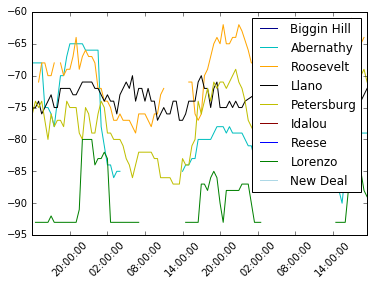

In [12]:
plt.plot(test[thing_to_plot]['Biggin'][interval_to_plot:],color='darkblue',label='Biggin Hill')
plt.plot(test[thing_to_plot]['Abernathy'][interval_to_plot:],color='c',label='Abernathy')
plt.plot(test[thing_to_plot]['Roosevelt'][interval_to_plot:],color='orange',label='Roosevelt')
plt.plot(test[thing_to_plot]['Llano'][interval_to_plot:],color='k',label='Llano')
plt.plot(test[thing_to_plot]['Petersburg'][interval_to_plot:],color='y',label='Petersburg')
plt.plot(test[thing_to_plot]['Idalou'][interval_to_plot:],color='darkred',label='Idalou')
plt.plot(test[thing_to_plot]['Reese'][interval_to_plot:],color='b',label='Reese')
plt.plot(test[thing_to_plot]['Lorenzo'][interval_to_plot:],color='green',label='Lorenzo')
plt.plot(test[thing_to_plot]['NewDeal'][interval_to_plot:],color='lightblue',label='New Deal')
# plt.plot(test[thing_to_plot]['Wolfforth'][interval_to_plot:],color='r',label='Wolfforth')
# plt.plot(test[thing_to_plot]['Estacado'][interval_to_plot:])
# plt.plot(test[thing_to_plot]['Shallowater'][interval_to_plot:])

plt.legend()
plt.xticks(rotation=45)
plt.show()

Less specified:

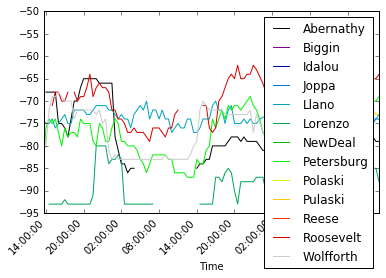

In [31]:
color=iter(cm.spectral(np.linspace(0,1,13)))
for i in range(len(test.index.levels[0])):
    c = next(color)
    test.loc[test.index.levels[0][i]][thing_to_plot].plot(label=test.index.levels[0][i],c=c)

plt.xlim((interval_to_plot,datetime.datetime.now()))
plt.legend()
plt.xticks(rotation=45)
plt.show()

Individual queries:

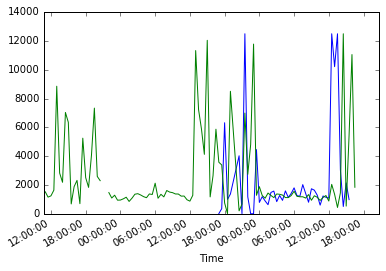

In [16]:
test.loc['Joppa']['Triggers'].plot()
test.loc['Pulaski']['Triggers'].plot()
# pd.rolling_mean(test.groupby(level='Time').mean()[thing_to_plot], 30).plot()
# pd.rolling_mean(test.groupby(level='Time').std()[thing_to_plot], 3).plot()

plt.xlim((interval_to_plot,datetime.datetime.now()+datetime.timedelta(hours=6)))
plt.show()

In [14]:
test.loc['Joppa']

,CPU Load 1,CPU Load 2,CPU Load 3,Boot,Root,shm,Data,GPS,Threshold,Triggers,Temp,PV Voltage,Battery Voltage,Load
Time,,,,,,,,,,,,,,
2016-02-28 02:02:04,2.12,2.08,2.06,10,82,1,1,9,-84,1071,21,0.000,12.449,11.757
2016-02-28 02:30:02,2.05,2.07,2.05,10,82,1,1,8,-84,1024,21,0.000,12.411,11.724
2016-02-28 03:00:02,2.02,2.08,2.06,10,82,1,1,9,-84,1023,20,0.000,12.386,11.695
2016-02-28 03:30:01,2.04,2.06,2.05,10,82,1,1,10,-84,1081,20,0.000,12.365,11.674
2016-02-28 04:00:02,2.04,2.05,2.05,10,82,1,1,9,-84,998,20,0.000,12.346,11.654
2016-02-28 04:30:02,2.05,2.05,2.05,10,82,1,1,9,-84,881,20,0.000,12.328,11.637
2016-02-28 05:00:01,2.01,2.03,2.05,10,81,1,1,9,-85,1041,19,0.000,12.314,11.618
2016-02-28 05:30:02,2.02,2.04,2.05,10,81,1,1,NaN,-85,1156,19,0.000,12.300,11.608
2016-02-28 06:00:02,2.02,2.04,2.05,10,81,1,1,8,-85,1094,19,0.000,12.292,11.599
